<a href="https://colab.research.google.com/github/Tambunan26/Machine-Learning/blob/master/Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pastikan versi TensorFlow yang kita gunakan adalah versi 2 ke atas
print(tf.__version__)

2.2.0


In [2]:
# Mempersiapkan data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

# Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Mendefinisikan nama direktori untuk data latih dan data validasi
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

--2020-07-23 16:19:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  22.6MB/s    in 3.0s    

2020-07-23 16:19:42 (22.6 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# Melihat struktur data yang telah kita unduh
os.listdir('/tmp/images/train')

['messy', 'clean']

In [4]:
# Melihat struktur data yang telah kita unduh
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
# Membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# Membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# Membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# Membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [9]:
# Proses augmentasi gambar atau untuk menciptakan data-data baru dari data yang telah ada
train_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(
    rescale=1./225,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest')

In [10]:
# Mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [11]:
# Membangun arsitektur sebuah CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Memanggil fungsi compile pada objek model
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# Melatih model menggunakan metode fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.7271 - accuracy: 0.4900 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.7059 - accuracy: 0.5300 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 3/20
25/25 - 6s - loss: 0.6927 - accuracy: 0.4800 - val_loss: 0.6782 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.6743 - accuracy: 0.5300 - val_loss: 0.6094 - val_accuracy: 0.5500
Epoch 5/20
25/25 - 6s - loss: 0.6988 - accuracy: 0.4100 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/20
25/25 - 6s - loss: 0.6944 - accuracy: 0.4900 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.6937 - accuracy: 0.4700 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6923 - accuracy: 0.5700 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 6s - loss: 0.6951 - accuracy: 0.4500 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6949 - accuracy: 0.4900 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

Saving kamar.jpg to kamar.jpg


NameError: ignored

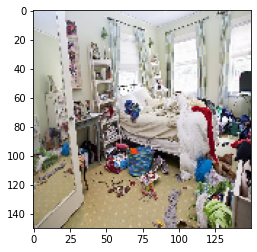

In [3]:
# Melihat hasil dari model yang telah kita buat
# Memungkinkan kita untuk secara interaktif memilih sebuah berkas gambar
# Melakukan resize gambar dan mengubahnya menjadi larik numpy
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')